In [72]:
import joblib
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
import time
from tkinter import *
from tkinter import filedialog
from tqdm import tqdm
from tqdm import notebook
import itertools
import math
import seaborn as sns

In [73]:
# Create Tk root
root = Tk()
# Hide the main window
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
infiles = filedialog.askopenfilename(multiple=True, title='load posthoc-predictions.npy')

%gui tk

In [75]:
infiles

('D:/kaycei/P16/011223/videos/VideoOutputCamera 0-12012023-133928_posthoc-predictions.npy',
 'D:/kaycei/P16/011223/videos/VideoOutputCamera 0-17012023-140804_posthoc-predictions.npy')

In [74]:
predictions = []
for f in range(len(infiles)):
    predictions.append(np.load(infiles[f]))

<AxesSubplot: xlabel='behavior', ylabel='animal'>

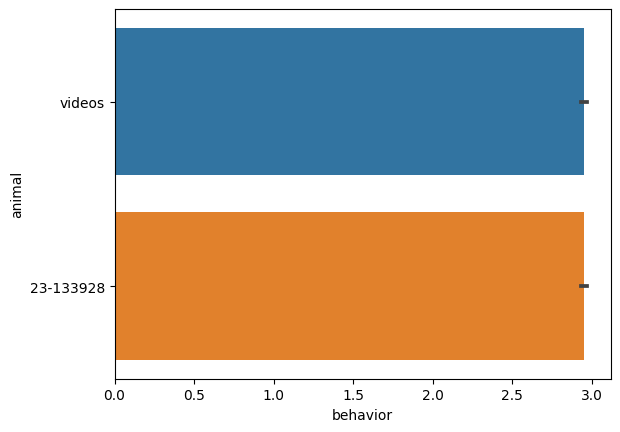

In [69]:
sns.barplot(data=df, x="behavior", y="animal")

In [77]:
# for f in range(len(infiles)):
data_dict = {'animal':np.hstack(([np.repeat(infiles[f].rpartition('_post')[0].rpartition('/')[2].rpartition(' 0-')[2], len(predictions[f])) 
                                  for f in range(len(infiles))])),
             'behavior': np.hstack([predictions[f] for f in range(len(predictions))])}
data_dict
                                                                    
df = pd.DataFrame(data = data_dict)
df

,animal,behavior
0,12012023-133928,4.0
1,12012023-133928,4.0
2,12012023-133928,4.0
3,12012023-133928,4.0
4,12012023-133928,4.0
...,...,...
57863,17012023-140804,4.0
57864,17012023-140804,4.0
57865,17012023-140804,4.0
57866,17012023-140804,4.0


<AxesSubplot: xlabel='behavior', ylabel='Count'>

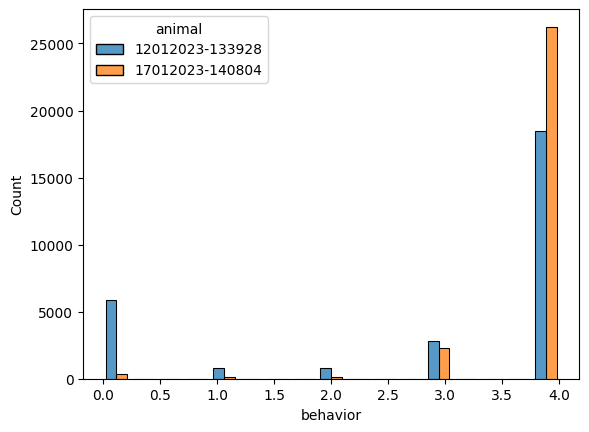

In [87]:
sns.histplot(data=df, x="behavior", hue="animal", 
             multiple="dodge", shrink=.8)

<AxesSubplot: xlabel='behavior', ylabel='Probability'>

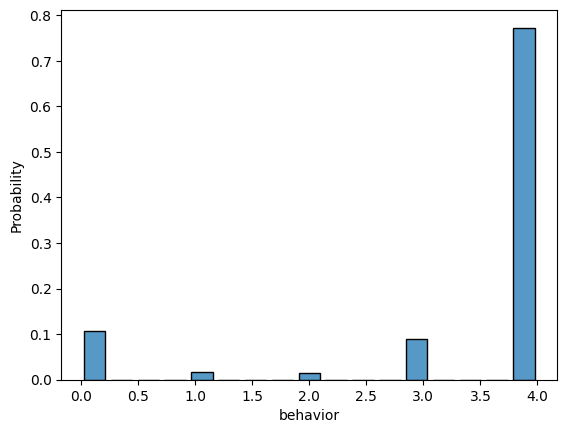

In [88]:
sns.histplot(data=df, x="behavior",
             stat='probability',
             multiple="dodge", shrink=.8)